In [1]:
import argparse
import pandas as pd
import sys
import numpy as np
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import chi2
# allow load_data funcs
sys.path.append("../data/")
from load_data import load_ucimlrepo

In [2]:
X,y = load_ucimlrepo(ordinal=False)
# X = data.features
# y = data.targets


# load our own demographics to predict on later

In [3]:
krystle_data = [32,"Private",36,4,"Bachelors degree(BA AB BS)","College or university","Married-civilian spouse present"," Other professional services"," Professional specialty","White","NA","Female","No","Not in universe","Full-time schedules",0,0,0,"Joint both under 65",' West',' California',' Householder',' Spouse of householder',0,'Nonmover','Nonmover','Nonmover',"Yes","No",0," Not in universe","United-States","United-States","United-States","Native- Born in the United States",0,"No",0,52,0,94]
nic_data = [25,"Private",36,4,"Bachelors degree(BA AB BS)","College or university","Never married"," Other professional services"," Professional specialty","White","Central or South American","Male","No","Not in universe","Full-time schedules",0,0,0,"Single",' South',' Georgia',' Householder',' Nonrelative of householder',1830.11,'Nonmover','Nonmover','Nonmover',"Yes"," Not in universe",6," Columbia","Columbia","United-States","United-States","Native- Born in the United States",0," Not in universe",0,52,0,94]
krystle_man_data = [32,"Private",36,4,"Bachelors degree(BA AB BS)","College or university","Married-civilian spouse present"," Other professional services"," Professional specialty","White","NA","Male","No","Not in universe","Full-time schedules",0,0,0,"Joint both under 65",' West',' California',' Householder',' Spouse of householder',0,'Nonmover','Nonmover','Nonmover',"Yes","No",0," Not in universe","United-States","United-States","United-States","Native- Born in the United States",0,"No",0,52,0,94]
nic_old_data = [25,"Private",36,4,"Bachelors degree(BA AB BS)","College or university","Never married"," Other professional services"," Professional specialty","White","Central or South American","Male","No","Not in universe","Full-time schedules",0,0,0,"Single",' South',' Georgia',' Householder',' Nonrelative of householder',1830.11,'Nonmover','Nonmover','Nonmover',"Yes"," Not in universe",6," Columbia","Columbia","United-States","United-States","Native- Born in the United States",0," Not in universe",0,52,0,94]
krystle_woman_old_data = [50,"Private",36,4,"Bachelors degree(BA AB BS)","College or university","Married-civilian spouse present"," Other professional services"," Professional specialty","White","NA","Female","No","Not in universe","Full-time schedules",0,0,0,"Joint both under 65",' West',' California',' Householder',' Spouse of householder',0,'Nonmover','Nonmover','Nonmover',"Yes","No",0," Not in universe","United-States","United-States","United-States","Native- Born in the United States",0,"No",0,52,0,94]
craig_data = craig_data = [25,"Private",36,4,"Bachelors degree(BA AB BS)","College or university","Never married"," Other professional services"," Professional specialty","White","NA","Male","No","Not in universe","Full-time schedules",0,0,1500,"Single",' West',' California',' In group quarters',' Group Quarters- Secondary individual',1830.11,'Nonmover','Nonmover','Nonmover',"No"," Not in universe",0," Not in universe","United-States","United-States","United-States","Native- Born in the United States",0," Not in universe",0,52,0,94]

In [4]:
X.loc[len(X)]=krystle_data
X.loc[len(X)]=nic_data
X.loc[len(X)]=nic_old_data
X.loc[len(X)]=krystle_man_old_data
X.loc[len(X)]=krystle_woman_old_data

In [6]:
X.loc[len(X)]=craig_data

In [ ]:
X[-6:]

In [109]:
print("associated occupations to a given industry")
for val in np.unique(X['ADTINK'].to_numpy()):
    print("ADTINK: ",val)
    print("ind:")
    print(np.unique(X[X['ADTINK']==val]['AMJIND'].to_numpy()))
    print("occ:")
    print(np.unique(X[X['ADTINK']==val]['AMJOCC'].to_numpy()))
    print()

associated occupations to a given industry
ADTINK:  0
ind:
[' Not in universe or children']
occ:
[' Not in universe']

ADTINK:  1
ind:
[' Agriculture']
occ:
[' Adm support including clerical' ' Executive admin and managerial'
 ' Farming forestry and fishing' ' Handlers equip cleaners etc '
 ' Machine operators assmblrs & inspctrs' ' Other service'
 ' Precision production craft & repair' ' Professional specialty'
 ' Protective services' ' Sales' ' Technicians and related support'
 ' Transportation and material moving']

ADTINK:  2
ind:
[' Agriculture']
occ:
[' Adm support including clerical' ' Executive admin and managerial'
 ' Farming forestry and fishing' ' Handlers equip cleaners etc '
 ' Machine operators assmblrs & inspctrs' ' Other service'
 ' Precision production craft & repair' ' Professional specialty' ' Sales'
 ' Technicians and related support' ' Transportation and material moving']

ADTINK:  3
ind:
[' Mining']
occ:
[' Adm support including clerical' ' Executive admin and man

In [72]:
np.unique(X['AHRSPAY'].to_numpy())

array([   0,   20,   70, ..., 9800, 9916, 9999])

# misc

In [28]:
print(X.keys())
print(y.keys())

Index(['AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWRT', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'AHRSPAY', 'year'],
      dtype='object')
Index(['income'], dtype='object')


In [22]:
X.keys()[30]

'PARENT'

In [25]:
a =np.array([ 30,5,36,13,19,37 ,40,28,20,26,25,24,34,10,33, 27, 9 ,12, 14,35, 31, 32,18, 21,16,1 ,22, 8 ,6 ,7 , 2 ,15,4 , 11, 3 , 23,  0 ,   17,  29])
col_names=[X.keys()[i] for i in a]
col_names

['PARENT',
 'AHSCOL',
 'VETQVA',
 'AUNTYPE',
 'GRINREG',
 'VETYN',
 'year',
 'MIGSUN',
 'GRINST',
 'MIGMTR4',
 'MIGMTR3',
 'MIGMTR1',
 'PRCITSHP',
 'AREORGN',
 'PENATVTY',
 'MIGSAME',
 'ARACE',
 'AUNMEM',
 'AWKSTAT',
 'SEOTR',
 'PEFNTVTY',
 'PEMNTVTY',
 'FILESTAT',
 'HHDFMX',
 'GAPLOSS',
 'ACLSWKR',
 'HHDREL',
 'AMJOCC',
 'AMARITL',
 'AMJIND',
 'ADTINK',
 'CAPGAIN',
 'AHGA',
 'ASEX',
 'ADTOCC',
 'MARSUPWRT',
 'AAGE',
 'DIVVAL',
 'NOEMP']

# prep data

In [7]:
from sklearn.preprocessing import OrdinalEncoder
for col in X:
    if X[col].nunique() < 53 or col == 'NOEMP':
        enc = OrdinalEncoder()
        X.loc[:,col] = enc.fit_transform(X[[col]])


# Random Forest

In [8]:
# random forest imports
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score ,StratifiedKFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

# metrics
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from functools import partial # beacause I want to send in a param to f1 to cross val
import seaborn as sns

In [9]:
from sklearn.model_selection import RandomizedSearchCV
#     "criterion":['gini','entropy'],
params = {
    "n_estimators":[50,100,500,1000],
    "max_features":["log2","sqrt",None],
    "min_samples_leaf":[1,2,3,4],
}
oob = partial(f1_score,average='macro') # because accuracy by default for random forest
n_jobs = -1



In [55]:
# _, pval = chi2(X.fillna(1000000),y)
# print("will use cols: ",X.columns[np.where(pval<.05)])
rf = RandomForestClassifier(oob_score=oob,n_jobs=n_jobs,class_weight='balanced_subsample',n_estimators=500,max_features="sqrt",min_samples_leaf=50)


In [56]:
cv = StratifiedKFold(n_splits=2)
train,test = list(cv.split(X[:-6],y))[0]

In [57]:
train,test

(array([ 99749,  99750,  99751, ..., 199520, 199521, 199522]),
 array([     0,      1,      2, ...,  99987, 100141, 100146]))

In [58]:
X[:-6],y

((199523, 41),
         income
 0       -50000
 1       -50000
 2       -50000
 3       -50000
 4       -50000
 ...        ...
 199518  -50000
 199519  -50000
 199520  -50000
 199521  -50000
 199522  -50000
 
 [199523 rows x 1 columns])

In [59]:
ravel_y  =np.ravel(y.to_numpy())

# vals = np.where(pval<.05)
# a = X.columns[vals]
rf.fit(X.iloc[train],y.loc[train])


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=50,
                       n_estimators=500, n_jobs=-1,
                       oob_score=functools.partial(<function f1_score at 0x7fdda3460ae0>, average='macro'))

In [60]:
pred_team = rf.predict(X[-6:])
print(pred_team)
pred_all = rf.predict(X[:-6])

['-50000' '-50000' '-50000' ' 50000+.' ' 50000+.' '-50000']


In [67]:
print(np.unique(y, return_counts=True))

(array([' 50000+.', '-50000'], dtype=object), array([ 12382, 187141]))


In [70]:
# 36760/(36760+162763), 2298/(2298+57559) # my ratio, nic's ratio +50k / total. ~6.% in the train.dat info

In [68]:
12382/(12382+187141)

0.06205800834991455

In [82]:
scores = cross_val_score(rf, X.iloc[train], y.iloc[train], cv=3, n_jobs=n_jobs,error_score=0)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [83]:
np.mean(scores)

0.8547127590544273

In [76]:
f1_score(y.iloc[test],rf.predict(X.iloc[test]),average='macro')

0.6760674901590127

In [77]:
f1_score(y.iloc[test],rf.predict(X.iloc[test]),average='weighted')

0.8880909561738678

In [78]:
from sklearn.metrics import balanced_accuracy_score 
balanced_accuracy_score(y.iloc[test],rf.predict(X.iloc[test]),)

0.8694461623616585

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y.iloc[test],rf.predict(X.iloc[test])))

              precision    recall  f1-score   support

     50000+.       0.29      0.88      0.43      6191
      -50000       0.99      0.86      0.92     93571

    accuracy                           0.86     99762
   macro avg       0.64      0.87      0.68     99762
weighted avg       0.95      0.86      0.89     99762



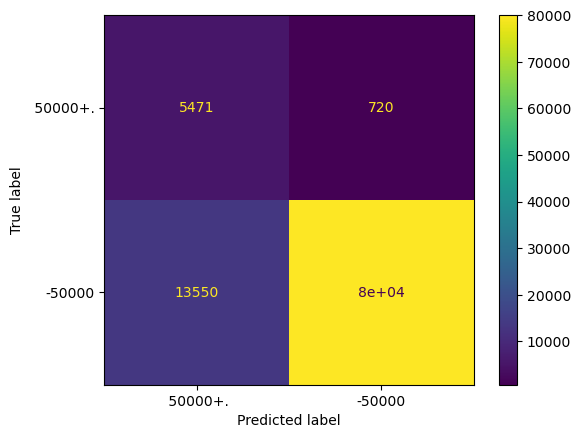

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y.iloc[test],rf.predict(X.iloc[test])) 

In [87]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(200,50))

tree_to_visualize = rf.estimators_[0]
tree.plot_tree(tree_to_visualize,feature_names=X.columns,class_names=["<50k",">50k"],filled=True,fontsize=12)
# fig.savefig('rf_individualtree.png')

[Text(0.23246130494258863, 0.9791666666666666, 'ADTINK <= 0.5\ngini = 0.5\nsamples = 63127\nvalue = [49880.5, 49880.5]\nclass = <50k'),
 Text(0.06808786434977579, 0.9375, 'ARACE <= 3.5\ngini = 0.209\nsamples = 32099\nvalue = [3610.091, 26787.093]\nclass = >50k'),
 Text(0.1502745846461822, 0.9583333333333333, 'True  '),
 Text(0.015134529147982063, 0.8958333333333334, 'AAGE <= 26.5\ngini = 0.092\nsamples = 5841\nvalue = [249.805, 4897.907]\nclass = >50k'),
 Text(0.007847533632286996, 0.8541666666666666, 'MIGMTR4 <= 1.5\ngini = 0.0\nsamples = 3978\nvalue = [0.0, 3336.526]\nclass = >50k'),
 Text(0.005605381165919282, 0.8125, 'gini = 0.0\nsamples = 81\nvalue = [0.0, 70.366]\nclass = >50k'),
 Text(0.010089686098654708, 0.8125, 'gini = 0.0\nsamples = 3897\nvalue = [0.0, 3266.16]\nclass = >50k'),
 Text(0.02242152466367713, 0.8541666666666666, 'HHDREL <= 5.5\ngini = 0.238\nsamples = 1863\nvalue = [249.805, 1561.381]\nclass = >50k'),
 Text(0.014573991031390135, 0.8125, 'NOEMP <= 0.5\ngini = 0.29

In [ ]:
mdi_importances = pd.Series(rf[0].feature_importances_,).sort_values(ascending=False)
col_names=[X[X.columns[vals]].keys()[i] for i in mdi_importances.index]
print("importances of best rf: ",col_names,mdi_importances)

AAGE ACLSWKR  ADTINK  ADTOCC  AHGA AHSCOL AMARITL AMJIND AMJOCC ARACE  \
0         73     3.0       0       0  12.0    2.0     6.0   14.0    6.0   4.0   
1         58     6.0       4      34  16.0    2.0     0.0    4.0    8.0   4.0   
2         18     3.0       0       0   0.0    1.0     4.0   14.0    6.0   1.0   
3          9     3.0       0       0  10.0    2.0     4.0   14.0    6.0   4.0   
4         10     3.0       0       0  10.0    2.0     4.0   14.0    6.0   4.0   
...      ...     ...     ...     ...   ...    ...     ...    ...    ...   ...   
199518    87     3.0       0       0   5.0    2.0     2.0   14.0    6.0   4.0   
199519    65     5.0      37       2   1.0    2.0     2.0    2.0    2.0   4.0   
199520    47     3.0       0       0  16.0    2.0     2.0   14.0    6.0   4.0   
199521    16     3.0       0       0   0.0    1.0     4.0   14.0    6.0   4.0   
199522    32     4.0      42      30  12.0    2.0     4.0   12.0    7.0   2.0   

        ... PARENT PEFNTVTY PEMNTVTY PENATVTY  PRCITSHP  SEOTR  VETYN WKSWORK  \
0       ...    4.0     39.0     39.0     39.0       4.0      0      2       0   
1       ...    4.0     39.0     39.0     39.0       4.0      0      2      52   
2       ...    4.0     40.0     40.0     40.0       0.0      0      2       0   
3       ...    0.0     39.0     39.0     39.0       4.0      0      0       0   
4       ...    0.0     39.0     39.0     39.0       4.0      0      0       0   
...     ...    ...      ...      ...      ...       ...    ...    ...     ...   
199518  ...    4.0      1.0     39.0     39.0       4.0      0      2       0   
199519  ...    4.0     39.0     39.0     39.0       4.0      0      2      52   
199520  ...    4.0     31.0     31.0     10.0       1.0      0      2      52   
199521  ...    0.0     39.0     39.0     39.0       4.0      0      2       0   
199522  ...    4.0      NaN      NaN      NaN       0.0      0      2      52   

       AHRSPAY year  
0            0    1  
1            0    0  
2            0    1  
3            0    0  
4            0    0  
...        ...  ...  
199518       0    1  
199519       0    0  
199520       0    1  
199521       0    1  
199522       0    0  

[199523 rows x 38 columns]

In [35]:
col_names=[X.keys()[i] for i in mdi_importances.index]
print("importances of best rf: ",col_names,mdi_importances)

rf.fit(X[col_names[:5]][:],ravel_y)
mdi_importances = pd.Series(rf[-1].feature_importances_,).sort_values(ascending=False)
col_names=[X.keys()[i] for i in mdi_importances.index]

print("importances of best rf: ",col_names,mdi_importances)


importances of best rf:  ['AMARITL', 'DIVVAL', 'WKSWORK', 'AAGE', 'MARSUPWRT', 'ADTOCC', 'AHGA', 'HHDREL', 'ASEX', 'ADTINK', 'CAPGAIN', 'AMJOCC', 'HHDFMX', 'NOEMP', 'AMJIND', 'ACLSWKR', 'GAPLOSS', 'FILESTAT', 'PEFNTVTY', 'AHRSPAY', 'PEMNTVTY', 'AWKSTAT', 'SEOTR', 'PENATVTY', 'AUNMEM', 'ARACE', 'AREORGN', 'MIGSAME', 'MIGMTR1', 'MIGSUN', 'MIGMTR3', 'MIGMTR4', 'PRCITSHP', 'GRINST', 'year', 'GRINREG', 'AUNTYPE', 'VETQVA', 'AHSCOL', 'VETYN', 'PARENT'] 6     0.183982
17    0.098097
38    0.072230
0     0.065526
23    0.061726
3     0.060507
4     0.058526
22    0.047228
11    0.040806
2     0.032667
15    0.031094
8     0.030136
21    0.029692
29    0.027028
7     0.024801
1     0.013621
16    0.012648
18    0.009778
31    0.009461
39    0.009033
32    0.008266
14    0.007542
35    0.007280
33    0.006207
12    0.006195
9     0.006151
10    0.004476
27    0.004226
24    0.004001
28    0.003944
25    0.003923
26    0.003636
34    0.003325
20    0.003083
40    0.002859
19    0.001781
13    0.0

In [16]:
col_names=[X.keys()[i] for i in mdi_importances.index]
print(mdi_importances)
print("importances of best rf: ",col_names)

21    0.215100
29    0.123767
0     0.084048
3     0.072935
23    0.056890
22    0.049626
17    0.044365
4     0.043798
11    0.031243
38    0.029010
2     0.027258
15    0.023797
7     0.023177
8     0.017691
1     0.013374
18    0.011190
32    0.010184
31    0.010138
16    0.010045
39    0.010027
6     0.009852
10    0.008512
14    0.008494
9     0.007471
35    0.006806
33    0.006504
12    0.005974
27    0.004937
28    0.003933
25    0.003877
26    0.003749
24    0.003719
20    0.003411
34    0.003289
40    0.003231
19    0.002972
30    0.001587
36    0.001278
37    0.001272
13    0.001163
5     0.000302
dtype: float64
importances of best rf:  ['HHDFMX', 'NOEMP', 'AAGE', 'ADTOCC', 'MARSUPWRT', 'HHDREL', 'DIVVAL', 'AHGA', 'ASEX', 'WKSWORK', 'ADTINK', 'CAPGAIN', 'AMJIND', 'AMJOCC', 'ACLSWKR', 'FILESTAT', 'PEMNTVTY', 'PEFNTVTY', 'GAPLOSS', 'AHRSPAY', 'AMARITL', 'AREORGN', 'AWKSTAT', 'ARACE', 'SEOTR', 'PENATVTY', 'AUNMEM', 'MIGSAME', 'MIGSUN', 'MIGMTR3', 'MIGMTR4', 'MIGMTR1', 'GRINST', 

In [30]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X[['ADTINK', 'ADTOCC', 'AAGE', 'AHGA', 'ACLSWKR']][:], y, n_repeats=2,
                                random_state=42,n_jobs=-10)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AAGE
Feature names seen at fit time, yet now missing:
- AMARITL


In [43]:
chi2, pval = chi2(X.fillna(1000000),y)
X.columns[np.where(pval<.05)]

/tmp/ipykernel_63625/502106465.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chi2, pval = chi2(X.fillna(1000000),y)


In [118]:
X[:]

AAGE                          ACLSWKR  ADTINK  ADTOCC  \
0         73                  Not in universe       0       0   
1         58   Self-employed-not incorporated       4      34   
2         18                  Not in universe       0       0   
3          9                  Not in universe       0       0   
4         10                  Not in universe       0       0   
...      ...                              ...     ...     ...   
199522    32                          Private      42      30   
199523    32                          Private       0       0   
199524    25                          Private      36       4   
199525    32                          Private       0       0   
199526    25                          Private      36       4   

                               AHGA                 AHSCOL  \
0              High school graduate        Not in universe   
1        Some college but no degree        Not in universe   
2                        10th grade            High school   
3                          Children        Not in universe   
4                          Children        Not in universe   
...                             ...                    ...   
199522         High school graduate        Not in universe   
199523   Bachelors degree(BA AB BS)  College or university   
199524   Bachelors degree(BA AB BS)  College or university   
199525   Bachelors degree(BA AB BS)  College or university   
199526   Bachelors degree(BA AB BS)  College or university   

                                AMARITL                        AMJIND  \
0                               Widowed   Not in universe or children   
1                              Divorced                  Construction   
2                         Never married   Not in universe or children   
3                         Never married   Not in universe or children   
4                         Never married   Not in universe or children   
...                                 ...                           ...   
199522                    Never married       Medical except hospital   
199523  Married-civilian spouse present   Not in universe or children   
199524                    Never married   Other professional services   
199525  Married-civilian spouse present   Not in universe or children   
199526                    Never married   Other professional services   

                                      AMJOCC                       ARACE  ...  \
0                            Not in universe                       White  ...   
1        Precision production craft & repair                       White  ...   
2                            Not in universe   Asian or Pacific Islander  ...   
3                            Not in universe                       White  ...   
4                            Not in universe                       White  ...   
...                                      ...                         ...  ...   
199522                         Other service                       Black  ...   
199523                       Not in universe                       White  ...   
199524                Professional specialty                       White  ...   
199525                       Not in universe                       White  ...   
199526                Professional specialty                       White  ...   

              PEFNTVTY        PEMNTVTY        PENATVTY  \
0        United-States   United-States   United-States   
1        United-States   United-States   United-States   
2              Vietnam         Vietnam         Vietnam   
3        United-States   United-States   United-States   
4        United-States   United-States   United-States   
...                ...             ...             ...   
199522             NaN             NaN             NaN   
199523   United-States   United-States   United-States   
199524        Columbia   United-States   United-States   
199525   United-States   United-States   United-Stat

In [30]:
X.columns[np.where(pval<.05)]

Index(['AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AWKSTAT',
       'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINST', 'HHDFMX',
       'HHDREL', 'MARSUPWRT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME',
       'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY',
       'PRCITSHP', 'SEOTR', 'VETYN', 'WKSWORK', 'AHRSPAY', 'year'],
      dtype='object')

In [83]:
f1_score(rf.predict(X[:-2]),y,average='macro')

0.9999784743213419

In [84]:
f1_score(rf.predict(X[:-2]),y,average='weighted')

0.999994987951996